<a href="https://colab.research.google.com/github/swaty369/Incident-Management-System/blob/final_files/incident_maangement_ML_swaty_2_ohe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing data

In [ ]:
data=pd.read_csv("/content/drive/My Drive/GL Capstone/incident_event_log.csv")
# data = pd.read_csv('incident_event_log.csv')
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [ ]:
# removing identifier columns like 'number', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', ''assignment_group', 'assigned_to'

data1 = data.drop(['number', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by', 'location', 'assignment_group', 'assigned_to'], axis=1)
data1.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,opened_at,sys_created_at,sys_updated_at,contact_type,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,New,True,0,0,0,True,29/2/2016 01:16,29/2/2016 01:23,29/2/2016 01:23,Phone,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,Resolved,True,0,0,2,True,29/2/2016 01:16,29/2/2016 01:23,29/2/2016 08:53,Phone,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,Resolved,True,0,0,3,True,29/2/2016 01:16,29/2/2016 01:23,29/2/2016 11:29,Phone,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,Closed,False,0,0,4,True,29/2/2016 01:16,29/2/2016 01:23,5/3/2016 12:00,Phone,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,New,True,0,0,0,True,29/2/2016 04:40,29/2/2016 04:57,29/2/2016 04:57,Phone,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [ ]:
data1.replace('?', np.nan, inplace=True)

In [ ]:
# removing columns which have more than 90% missing values, also removing 'sys_created_at' as has similar values as of 'opened_at'
data2 = data1.drop(['caused_by','vendor','cmdb_ci','rfc','problem_id', 'sys_created_at'],axis=1)

data2.shape

(141712, 22)

In [ ]:
null_columns = data2.isnull().sum()[data2.isnull().sum()>0].index
null_columns

Index(['category', 'subcategory', 'u_symptom', 'closed_code', 'resolved_by',
       'resolved_at'],
      dtype='object')

In [ ]:
#replacing categorical features with their mode values
for i in ['category', 'subcategory', 'u_symptom', 'closed_code', 'resolved_by']:
    data2[i]=data2[i].fillna(data2[i].mode()[0])
    
    

In [ ]:
# resolved at is date column so its better to fill null values with forward filling
data2['resolved_at'].fillna(method='ffill', inplace=True)

In [ ]:
# checking missing values
data2.isnull().sum().sum()

0

## Data Preprocessing:

In [ ]:
# here we see a lot of columns which are actually dates but not categories
dates = ['opened_at', 'resolved_at', 'closed_at', 'sys_updated_at']

# updating datatype of the date columns

for feat in dates:
    data2[feat] = pd.to_datetime(data2[feat], format='%d/%m/%Y %H:%M')

In [ ]:
## extracting numerical values from categorical features when possible
data2['impact'] = data2['impact'].apply(lambda x: x.split()[0]).astype(int)
data2['urgency'] = data2['urgency'].apply(lambda x: x.split()[0]).astype(int)
data2['priority'] = data2['priority'].apply(lambda x: x.split()[0]).astype(int)
data2['active'] = data2['active'].apply(lambda x: int(x))
data2['made_sla'] = data2['made_sla'].apply(lambda x: int(x))
data2['knowledge'] = data2['knowledge'].apply(lambda x: int(x))
data2['u_priority_confirmation'] = data2['u_priority_confirmation'].apply(lambda x: int(x))


In [ ]:
# creating predicted_closed_days column to predict sla timeline
data2['predicted_closed_days']=(data2.closed_at- data2.opened_at).dt.total_seconds()/ (24 * 60 * 60)

In [ ]:
# # separating opened_at column for days, month, time, year
data2['opened_year']=data2.opened_at.dt.year
data2['opened_month']=data2.opened_at.dt.month
data2['opened_day'] = data2.opened_at.dt.day
data2['opened_hour'] = data2.opened_at.dt.hour
data2['opened_minute'] = data2.opened_at.dt.minute

In [ ]:
# # separating sys_updated_at column for days, month, time, year
# data2['sys_updated_year']=data2.sys_updated_at.dt.year
# data2['sys_updated_month']=data2.sys_updated_at.dt.month
# data2['sys_updated_day'] = data2.sys_updated_at.dt.day
# data2['sys_updated_hour'] = data2.sys_updated_at.dt.hour
# data2['sys_updated_minute'] = data2.sys_updated_at.dt.minute

In [ ]:
# # separating resolved_at column for days, month, time, year
# data2['resolved_year']=data2.resolved_at.dt.year
# data2['resolved_month']=data2.resolved_at.dt.month
# data2['resolved_day'] = data2.resolved_at.dt.day
# data2['resolved_hour'] = data2.resolved_at.dt.hour
# data2['resolved_minute'] = data2.resolved_at.dt.minute

In [ ]:
# # separating closed_at column for days, month, time, year
# data2['closed_year']=data2.closed_at.dt.year
# data2['closed_month']=data2.closed_at.dt.month
# data2['closed_day'] = data2.closed_at.dt.day
# data2['closed_hour'] = data2.closed_at.dt.hour
# data2['closed_minute'] = data2.closed_at.dt.minute

In [ ]:
# creating predicted_closed_days column to predict sla timeline
data2['updated_days_diff']=(data2.sys_updated_at- data2.opened_at).dt.total_seconds()/ (24 * 60 * 60)

In [ ]:
data3 = data2.drop(['resolved_by', 'resolved_at', 'closed_at', 'sys_updated_at', 'opened_at', 'made_sla', 'closed_code', 'notify'], axis=1)
data3.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,contact_type,category,subcategory,u_symptom,impact,urgency,priority,knowledge,u_priority_confirmation,predicted_closed_days,opened_year,opened_month,opened_day,opened_hour,opened_minute,updated_days_diff
0,New,1,0,0,0,Phone,Category 55,Subcategory 170,Symptom 72,2,2,3,1,0,5.447222,2016,2,29,1,16,0.004861
1,Resolved,1,0,0,2,Phone,Category 55,Subcategory 170,Symptom 72,2,2,3,1,0,5.447222,2016,2,29,1,16,0.317361
2,Resolved,1,0,0,3,Phone,Category 55,Subcategory 170,Symptom 72,2,2,3,1,0,5.447222,2016,2,29,1,16,0.425694
3,Closed,0,0,0,4,Phone,Category 55,Subcategory 170,Symptom 72,2,2,3,1,0,5.447222,2016,2,29,1,16,5.447222
4,New,1,0,0,0,Phone,Category 40,Subcategory 215,Symptom 471,2,2,3,1,0,6.222222,2016,2,29,4,40,0.011806


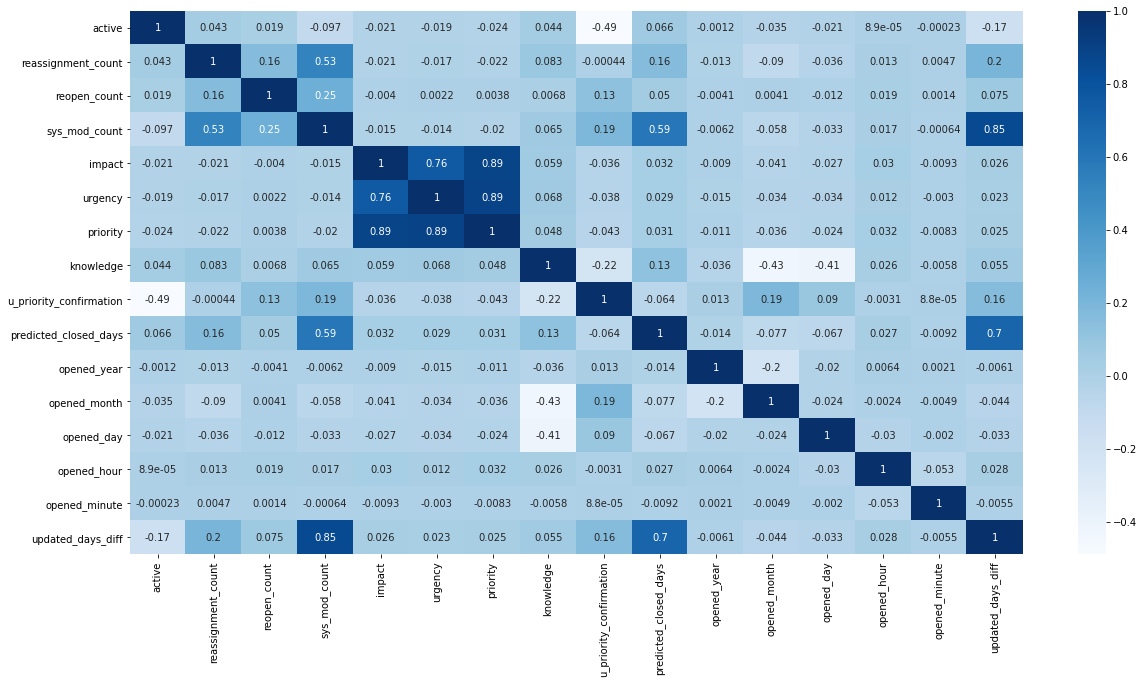

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data3.corr(), cmap='Blues', annot=True)
plt.show()

**Inference:**
we can see from graph that impact, urgency and priority seems to have very high corrrealtion, also its understood that prioirity is decided later , impact and urgency way before.

$$ impact * urgency = priority $$

- using Eisenhower's Urgent/Important principle to priortize incidents when we get them
    impact
    
|Priority |impact  |Low-3 |Medium-2|  High -1|
|---------|--------|------|--------|---------|
|         |High   - 1 |Medium|High | Critical|
|urgency  |Medium - 2 Low    |Medium|    High|
|         |Low    -3 |Low   |Low   |   Medium|



**Inference2:**
We can also see sys mod count and updated days seem to have high colinearity which makes sense because if sys_mod_count is high means difference in days will be higher

In [ ]:
# using one hot encoding for incident_state
# incident_state_encoded = pd.get_dummies(data4.incident_state, drop_first=True, prefix='incident_state_')

data3.describe(include='object')

,incident_state,contact_type,category,subcategory,u_symptom
count,141712,141712,141712,141712,141712
unique,9,5,58,254,525
top,Active,Phone,Category 26,Subcategory 174,Symptom 491
freq,38716,140462,18531,35896,84949


In [ ]:
# for the categorical features we have its understood that we have lots of categories however the values are not ordianl, hence lets apply one hot encoding
data4 = pd.get_dummies(data3, drop_first=True)

In [ ]:
data4.describe()

active  reassignment_count   reopen_count  sys_mod_count  \
count  141712.000000       141712.000000  141712.000000  141712.000000   
mean        0.823685            1.104197       0.021918       5.080946   
std         0.381090            1.734673       0.207302       7.680652   
min         0.000000            0.000000       0.000000       0.000000   
25%         1.000000            0.000000       0.000000       1.000000   
50%         1.000000            1.000000       0.000000       3.000000   
75%         1.000000            1.000000       0.000000       6.000000   
max         1.000000           27.000000       8.000000     129.000000   

              impact        urgency       priority      knowledge  \
count  141712.000000  141712.000000  141712.000000  141712.000000   
mean        2.002787       1.997022       2.975598       0.178976   
std         0.228142       0.231837       0.335485       0.383333   
min         1.000000       1.000000       1.000000       0.000000   
25%         2.000000       2.000000       3.000000       0.000000   
50%         2.000000       2.000000       3.000000       0.000000   
75%         2.000000       2.000000       3.000000       0.000000   
max         3.000000       3.000000       4.000000       1.000000   

       u_priority_confirmation  predicted_closed_days    opened_year  \
count            141712.000000          141712.000000  141712.000000   
mean                  0.289122              17.062177    2016.005850   
std                   0.453356              27.156357       0.076261   
min                   0.000000               0.000000    2016.000000   
25%                   0.000000               5.213194    2016.000000   
50%                   0.000000               9.373611    2016.000000   
75%                   1.000000              17.406250    2016.000000   
max                   1.000000             341.275694    2017.000000   

        opened_month     opened_day    opened_hour  opened_minute  \
count  141712.000000  141712.000000  141712.000000  141712.000000   
mean        3.863512      14.764861      11.888231      29.471908   
std         0.975897       9.013883       4.009268      17.253068   
min         1.000000       1.000000       0.000000       0.000000   
25%         3.000000       7.000000       9.000000      14.000000   
50%         4.000000      14.000000      11.000000      30.000000   
75%         5.000000      23.000000      15.000000      44.000000   
max        12.000000      31.000000      23.000000      59.000000   

       updated_days_diff  incident_state_Active  \
count      141712.000000          141712.000000   
mean            6.521298               0.273202   
std            18.095817               0.445605   
min            -0.102083               0.000000   
25%             0.011111               0.000000   
50%             1.008333               0.000000   
75%             5.992361               1.000000   
max           341.275694               1.000000   

       incident_state_Awaiting Evidence  incident_state_Awaiting Problem  \
count                     141712.000000                    141712.000000   
mean                           0.000268                         0.003253   
std                            0.016373                         0.056943   
min                            0.000000                         0.000000   
25%                            0.000000                         0.000000   
50%                            0.000000                         0.000000   
75%                            0.000000                         0.000000   
max                            1.000000                         1.000000   

       incident_state_Awaiting User Info  incident_state_Awaiting Vendor  \
count                      141712.000000                   141712.000000   
mean                            0.103322                        0.004989   
std                             0.304380                        0.070457   
min  

In [ ]:
# merginging encoded incident_state columns to data 5
data_final = data4.copy()

data_final.head()

,active,reassignment_count,reopen_count,sys_mod_count,impact,urgency,priority,knowledge,u_priority_confirmation,predicted_closed_days,opened_year,opened_month,opened_day,opened_hour,opened_minute,updated_days_diff,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,contact_type_Email,contact_type_IVR,contact_type_Phone,contact_type_Self service,category_Category 12,category_Category 13,category_Category 14,category_Category 15,category_Category 16,category_Category 17,category_Category 19,category_Category 2,category_Category 20,category_Category 21,category_Category 22,category_Category 23,category_Category 24,category_Category 25,category_Category 26,category_Category 27,category_Category 28,category_Category 29,category_Category 3,category_Category 30,category_Category 31,category_Category 32,category_Category 33,category_Category 34,category_Category 35,category_Category 36,category_Category 37,category_Category 38,category_Category 4,category_Category 40,category_Category 41,category_Category 42,category_Category 43,category_Category 44,category_Category 45,category_Category 46,category_Category 47,category_Category 48,category_Category 49,category_Category 5,category_Category 50,category_Category 51,category_Category 52,category_Category 53,category_Category 54,category_Category 55,category_Category 56,category_Category 57,category_Category 58,category_Category 59,category_Category 6,category_Category 61,category_Category 62,category_Category 63,category_Category 7,category_Category 8,category_Category 9,subcategory_Subcategory 100,subcategory_Subcategory 101,subcategory_Subcategory 102,subcategory_Subcategory 103,subcategory_Subcategory 104,subcategory_Subcategory 105,subcategory_Subcategory 106,subcategory_Subcategory 107,subcategory_Subcategory 109,subcategory_Subcategory 11,subcategory_Subcategory 110,subcategory_Subcategory 111,subcategory_Subcategory 112,subcategory_Subcategory 113,subcategory_Subcategory 114,subcategory_Subcategory 115,subcategory_Subcategory 116,subcategory_Subcategory 117,subcategory_Subcategory 118,subcategory_Subcategory 119,subcategory_Subcategory 12,subcategory_Subcategory 120,subcategory_Subcategory 122,subcategory_Subcategory 123,subcategory_Subcategory 124,subcategory_Subcategory 125,subcategory_Subcategory 126,subcategory_Subcategory 127,subcategory_Subcategory 128,subcategory_Subcategory 129,subcategory_Subcategory 13,subcategory_Subcategory 130,subcategory_Subcategory 131,subcategory_Subcategory 132,subcategory_Subcategory 134,subcategory_Subcategory 135,subcategory_Subcategory 136,subcategory_Subcategory 138,subcategory_Subcategory 14,subcategory_Subcategory 140,subcategory_Subcategory 141,subcategory_Subcategory 142,subcategory_Subcategory 144,subcategory_Subcategory 145,subcategory_Subcategory 146,subcategory_Subcategory 149,subcategory_Subcategory 150,subcategory_Subcategory 151,subcategory_Subcategory 152,subcategory_Subcategory 153,subcategory_Subcategory 154,subcategory_Subcategory 155,subcategory_Subcategory 156,subcategory_Subcategory 157,subcategory_Subcategory 158,subcategory_Subcategory 159,subcategory_Subcategory 16,subcategory_Subcategory 160,subcategory_Subcategory 161,subcategory_Subcategory 162,subcategory_Subcategory 163,subcategory_Subcategory 164,subcategory_Subcategory 165,subcategory_Subcategory 166,subcategory_Subcategory 167,subcategory_Subcategory 168,subcategory_Subcategory 169,subcategory_Subcategory 17,subcategory_Subcategory 170,subcategory_Subcategory 171,subcategory_Subcategory 172,subcategory_Subcategory 173,subcategory_Subcategory 174,subcategory_Subcategory 175,subcategory_Subcategory 176,subcategory_Subcategory 177,subcategory_Subcategory 178,subcategory_Subcategory 179,subcategory_Subcategory 18,subcategory_Subcategory 181,subcategory_Subcategory 182,subcategory_Subcategory 183,subcategor

**Inference:**
We can see as we have use ohe we now have too many columns probably we can use pca to reduce the components and get only those which bring a lot of value

In [ ]:
X = data_final.drop(['predicted_closed_days'], axis=1)
y = data_final['predicted_closed_days']

# PCA

In [ ]:
# its very important to scale the columns before we apply pca
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
std_df = scaler.fit_transform(X)



In [ ]:
# instantiate and fetching pca components
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(std_df)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

AttributeError: ignored

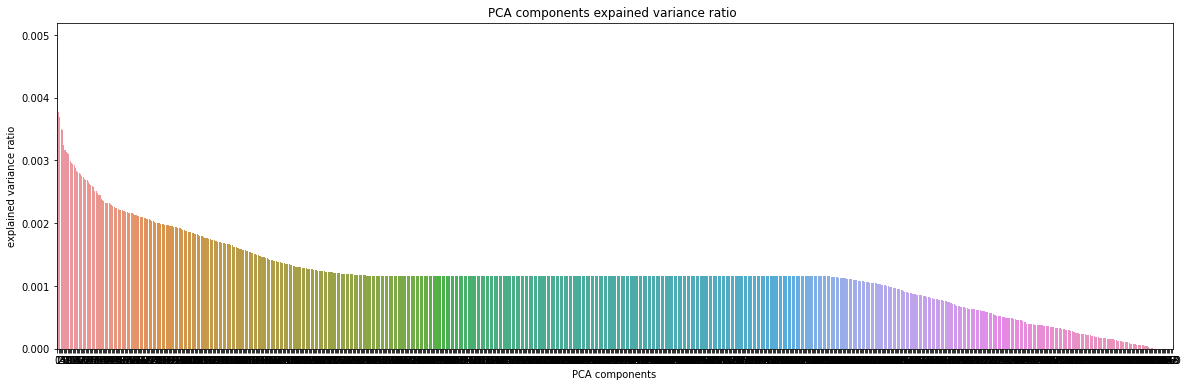

In [ ]:
# from the graph we can notice that we dont actually need the entire data to get all out information
plt.figure(figsize=(20,6))
plt.title("PCA components expained variance ratio ")
sns.barplot(np.arange(X.shape[1]),pca.explained_variance_ratio_)
plt.xlabel("PCA components")
plt.ylabel("explained variance ratio")
plt.xticks(orient=90)

In [ ]:
pca = PCA(0.95)
pca.fit(std_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(f"actual fetures after OHE: {X.shape[1]}")
print(f"actual fetures after OHE: {len(pca.explained_variance_ratio_)}")
862-len(pca.explained_variance_ratio_)

actual fetures after OHE: 861
actual fetures after OHE: 697


165

**Inference:**
We can see here clearly that out of 861 features by using just 697 components we can collect 95% of 

# Splitting data for training and testing


In [ ]:
# X = data_final.drop('predicted_closed_days', axis=1)
# y = data_final['predicted_closed_days']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain , ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print("Training set size", xtrain.shape[0])
print("Testing set size", xtest.shape[0])


Training set size 99198
Testing set size 42514


In [ ]:
# Creating a pipeline to scale and then get pca components
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([('scaler',StandardScaler()), 
                 ('reducer', PCA(n_components=0.95)),
                 ('classifier', RandomForestRegressor(n_estimators=30))])

#scale-reduce-train model
pipe.fit(xtrain, ytrain)
print(pipe.steps)

pipe.steps[1][1].explained_variance_ratio_.cumsum()


[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('reducer', PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('classifier', RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False))]


array([0.00499514, 0.00883443, 0.01257688, 0.01614025, 0.01967575,
       0.02297765, 0.02627153, 0.02948898, 0.03267914, 0.03582457,
       0.03884216, 0.04183845, 0.04480816, 0.04776143, 0.05067403,
       0.05353869, 0.05637836, 0.05921403, 0.06204087, 0.06484787,
       0.06762325, 0.07036499, 0.0730979 , 0.07581364, 0.07849492,
       0.08116165, 0.083809  , 0.08644421, 0.08905924, 0.09161438,
       0.0941306 , 0.09663221, 0.09912618, 0.1015875 , 0.10399905,
       0.106398  , 0.1087905 , 0.11114981, 0.11350898, 0.1158671 ,
       0.11822329, 0.120572  , 0.12289073, 0.12519565, 0.12749716,
       0.12978455, 0.13206418, 0.1343345 , 0.13659877, 0.13884713,
       0.14108667, 0.14331859, 0.14554555, 0.14776677, 0.14998066,
       0.15219294, 0.15439858, 0.15660091, 0.15879825, 0.16098932,
       0.16317127, 0.16534163, 0.16750514, 0.1696634 , 0.17180955,
       0.17395253, 0.17608564, 0.1782144 , 0.18033625, 0.18245615,
       0.18457349, 0.18668453, 0.18878257, 0.1908792 , 0.19296

In [ ]:
#evaluating the model
print(f"Training : {pipe.score(xtrain, ytrain)}")
print(f"Testing : {pipe.score(xtest, ytest)}")

Training : 0.9570600822686859
Testing : 0.7136558144071584


**Inference:** WE Can see even using 95% of information we are getting training result of 0.957 which is not too bad, however there the training scores is pretty less just 0.71 and the difference between the two indicates an overfit model lets tune the model and see if it does any better.

In [ ]:
ypred_train = pipe.predict(xtrain)
ypred_test = pipe.predict(xtest)

In [ ]:
# creating score card
score_card = pd.DataFrame(columns=['model_name', 'train_rmse', 'test_rmse', 'train_rsquared', 'test_rsquared'])
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared


In [ ]:
# evaluating the model 


In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_rf_pca = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_rf_pca = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_rf_pca = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_rf_pca = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
rf_model_pca_sc = pd.Series({'model_name' : 'rf model - pca components - 95%', 
                             'train_rmse' : rmse_train_rf_pca, 'test_rmse' : rmse_test_rf_pca, 
                             'train_rsquared' : rsquared_train_rf_pca, 'test_rsquared' : rsquared_test_rf_pca})

score_card = score_card.append(rf_model_pca_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,rf model - pca components - 95%,5.674,14.245,0.957,0.714


In [ ]:
# getting pca components using pipe

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reduce', PCA(n_components=0.95))])

# train the model
pipe.fit(xtrain, ytrain)




Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reduce',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [ ]:
xtrain_pca = pipe.transform(xtrain)
xtest_pca = pipe.transform(xtest)

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123, max_depth=30, l1=5)
xg_reg.fit(xtrain_pca, ytrain)

# predict the values
ypred_train = xg_reg.predict(xtrain_pca)
ypred_test = xg_reg.predict(xtest_pca)

In [ ]:
# Evaluating model's pexgbormance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_xgb_pca95 = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_xgb_pca95 = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_xgb_pca95 = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_xgb_pca95 = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
xgb_model_pca95_sc_tuned = pd.Series({'model_name' : 'XG Boost - pca 95% - (scaled - hertuned)', 
                             'train_rmse' : rmse_train_xgb_pca95, 'test_rmse' : rmse_test_xgb_pca95, 
                             'train_rsquared' : rsquared_train_xgb_pca95, 'test_rsquared' : rsquared_test_xgb_pca95})

score_card = score_card.append(xgb_model_pca95_sc_tuned, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,rf model - pca components - 95%,5.674,14.245,0.957,0.714
1,XG Boost - pca 95% - (scaled - hertuned),13.168,17.649,0.769,0.560


In [ ]:
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,rf model - pca components - 95%,5.674,14.245,0.957,0.714
1,XG Boost - pca 95% - (scaled - hertuned),13.168,17.649,0.769,0.560


# XGBoost -pca 95% - hypertuned - scaled

In [ ]:
# tuning the parameters
# # lets try tuning our descision tree
from sklearn.model_selection import RandomizedSearchCV



param_grid = {'learning_rate' : [0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
             'max_depth' : np.arange(2,50),
             'subsample' : [0.8, 0.9, 1],
              'colsample_bytree' :[0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
              'gamma' : [0,1,5],
              'l1' : [1,2,3,5,7,9,11,13],
              # 'max_leaf_nodes' : np.arange(2,50,3),
              # 'max_samples' : np.arange(2,50,3),
              'n_estimators' : [30,50,100]
             }

searcher = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror', seed=123), param_grid, cv=5, random_state=0)

#train model
searcher.fit(xtrain_pca, ytrain)

In [ ]:
searcher.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'l1': 5,
 'learning_rate': 1,
 'max_depth': 4,
 'n_estimators': 30,
 'subsample': 1}

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'contact_type', 'category', 'subcategory', 'u_symptom',
       'knowledge', 'u_priority_confirmation', 'notify', 'opened_year',
       'opened_month', 'opened_day', 'opened_hour', 'opened_minute',
       'updated_days_diff', 'priority_calculated'],
      dtype='object')

In [ ]:
import xgboost as xgb

xg_reg_all_scaled_tuned = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=30, colsample_bytree=0.8, gamma=0, l1=5, learning_rate=1, max_depth=4, subsample=1, seed=0)
xg_reg_all_scaled_tuned.fit(xtrain, ytrain)

# predict the values
ypred_train = xg_reg_all_scaled_tuned.predict(xtrain)
ypred_test = xg_reg_all_scaled_tuned.predict(xtest)

In [ ]:
# Evaluating model's pexgbormance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_xgb_all_scaled_tuned = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_xgb_all_scaled_tuned = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_xgb_all_scaled_tuned = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_xgb_all_scaled_tuned = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
xgb_model_all_scaled_tuned_sc = pd.Series({'model_name' : 'XG Boost model all features - (scaled & tuned)', 
                             'train_rmse' : rmse_train_xgb_all_scaled_tuned, 'test_rmse' : rmse_test_xgb_all_scaled_tuned, 
                             'train_rsquared' : rsquared_train_xgb_all_scaled_tuned, 'test_rsquared' : rsquared_test_xgb_all_scaled_tuned})

score_card = score_card.append(xgb_model_all_scaled_tuned_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.376,0.999,0.470
2,rf model using vif selected features,5.487,13.794,0.960,0.732
3,XG Boost model using vif selected features,20.987,20.385,0.413,0.414
4,XG Boost model using vif selected features - (...,13.862,17.888,0.744,0.548
5,rf model using all features,5.087,12.752,0.965,0.771
6,rf model using all features - (tuned),14.031,15.491,0.737,0.661
7,rf model using rf selected features,5.129,12.751,0.965,0.771
8,rf model using rf selected features - (hypertu...,13.882,15.395,0.743,0.666
9,rf model using rf selected features - scaled,4.969,12.857,0.967,0.767


# Base Linear model (OLS)

In [ ]:
import statsmodels.api as sm

X_constant=sm.add_constant(X)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.534
Model:                               OLS   Adj. R-squared:                  0.534
Method:                    Least Squares   F-statistic:                     8547.
Date:                   Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                           02:51:33   Log-Likelihood:            -6.1485e+05
No. Observations:                 141712   AIC:                         1.230e+06
Df Residuals:                     141692   BIC:                         1.230e+06
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5964.8461   1385.384      4.306      0.000    3249.521    8680.172
incident_state             -0.2175      0.021    -10.571      0.000      -0.258      -0.177
active                      9.9903      0.152     65.591      0.000       9.692      10.289
reassignment_count          0.1217      0.041      2.943      0.003       0.041       0.203
reopen_count                1.1437      0.260      4.403      0.000       0.635       1.653
sys_mod_count              -0.1411      0.019     -7.522      0.000      -0.178      -0.104
contact_type                3.5996      0.495      7.271      0.000       2.629       4.570
category                    0.0063      0.003      1.814      0.070      -0.001       0.013
subcategory                -0.0062      0.001     -7.862      0.000      -0.008      -0.005
u_symptom                  -0.0018      0.000     -4.193      0.000      -0.003      -0.001
knowledge                   3.7076      0.167     22.140      0.000       3.379       4.036
u_priority_confirmation    -5.4120      0.147    -36.924      0.000      -5.699      -5.125
notify                      5.2407      1.962      2.671      0.008       1.396       9.086
opened_year                -2.9622      0.687     -4.310      0.000      -4.309      -1.615
opened_month               -0.0898      0.063     -1.417      0.156      -0.214       0.034
opened_day                 -0.0295      0.006     -4.724      0.000      -0.042      -0.017
opened_hour                 0.0275      0.012      2.226      0.026       0.003       0.052
opened_minute              -0.0073      0.003     -2.555      0.011      -0.013      -0.002
updated_days_diff           1.1438      0.007    169.130      0.000       1.131       1.157
priority_calculated         0.6236      0.148      4.213      0.000       0.334       0.914
==============================================================================
Omnibus:                   184995.472   Durbin-Watson:                   0.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         33426141.890
Skew:                           7.471   Prob(JB):                         0.00
Kurtosis:                      76.741   Cond. No.                     5.76e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## checking all assumptions:

### 1. Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=X.columns.tolist()
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif.sort_values(by='vif',ascending=False)

,columns,vif
12,opened_year,952.801471
5,contact_type,871.056501
18,priority_calculated,80.980967
13,opened_month,23.748431
4,sys_mod_count,12.308966
15,opened_hour,9.869634
8,u_symptom,9.528581
1,active,7.877653
17,updated_days_diff,6.976540
0,incident_state,5.700441


In [ ]:
inp1 = X.drop(['opened_year', 'contact_type', 'priority_calculated', 'opened_month', 'sys_mod_count', 'u_symptom','opened_hour','active'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['columns']=inp1.columns.tolist()
vif['vif']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]

vif.sort_values(by='vif',ascending=False)

,columns,vif
0,incident_state,4.516717
3,category,4.217624
8,opened_day,3.533589
9,opened_minute,3.346112
4,subcategory,3.320472
6,u_priority_confirmation,1.889692
1,reassignment_count,1.491409
5,knowledge,1.463778
10,updated_days_diff,1.220438
2,reopen_count,1.072791


In [ ]:
X_constant=sm.add_constant(inp1)

ols = sm.OLS(y, X_constant)
ols_mod = ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     predicted_closed_days   R-squared:                       0.520
Model:                               OLS   Adj. R-squared:                  0.520
Method:                    Least Squares   F-statistic:                 1.393e+04
Date:                   Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                           02:54:01   Log-Likelihood:            -6.1702e+05
No. Observations:                 141712   AIC:                         1.234e+06
Df Residuals:                     141700   BIC:                         1.234e+06
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      13.9378      0.227     61.376      0.000      13.493      14.383
incident_state             -0.1139      0.021     -5.488      0.000      -0.155      -0.073
reassignment_count          0.0486      0.030      1.607      0.108      -0.011       0.108
reopen_count                2.1765      0.249      8.757      0.000       1.689       2.664
category                    0.0083      0.004      2.359      0.018       0.001       0.015
subcategory                -0.0063      0.001     -7.921      0.000      -0.008      -0.005
knowledge                   3.1635      0.147     21.473      0.000       2.875       3.452
u_priority_confirmation   -10.0278      0.128    -78.338      0.000     -10.279      -9.777
notify                     -2.1797      1.727     -1.262      0.207      -5.565       1.205
opened_day                 -0.0295      0.006     -4.850      0.000      -0.041      -0.018
opened_minute              -0.0081      0.003     -2.800      0.005      -0.014      -0.002
updated_days_diff           1.0779      0.003    374.883      0.000       1.072       1.084
==============================================================================
Omnibus:                   181875.852   Durbin-Watson:                   0.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30701970.557
Skew:                           7.260   Prob(JB):                         0.00
Kurtosis:                      73.631   Cond. No.                     4.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Inference:**
    We can see that multicolinearity is not entirely solved however reduced drastically from the previous model, even after removing almost all important features and getting maximum vif below 50 we see condition number is very high. Anyways in real work data it is not possible to meet all assumptions hence lets use the current results and continue with our model.

In [ ]:
# inp2 = X.drop(['opened_year', 'active', 'contact_type'], axis=1)

### 2. Normality test

In [ ]:
# statistical test 
# jarque bera where test value should be less
# H0 : Normally distributed
# H1: Not normally distributed

from scipy import stats
t, pval = stats.jarque_bera(ols_mod.resid)

if pval>=0.05:
    print("Residues are normally distributed")
else:
    print("Residues are not normally distributed")

Residues are not normally distributed


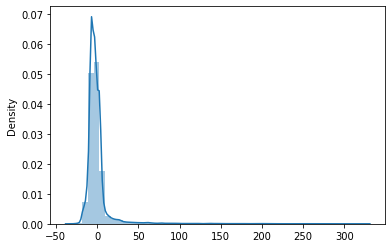

In [ ]:
# checking visually
sns.distplot(ols_mod.resid)

**Inference:**
    We can see residues are not normally distributed indicating few very high or very low values probably causing skewness. We can see that target has lots of values which are either too high or too low which also makes sense as some cases are taking longer than usual to be resolec

### 3. Linearity of Residuals:

In [ ]:
ypred = ols_mod.predict(X_constant)



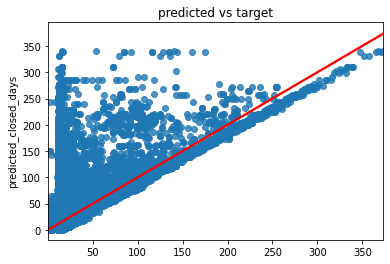

In [ ]:
#plot observed should be linear
plt.title("predicted vs target")
sns.regplot(ypred, y, line_kws= {'color':'red'})

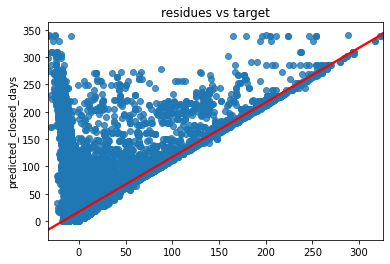

In [ ]:
# plot observed should be random
plt.title("residues vs target")
sns.regplot(ols_mod.resid, y, line_kws= {'color':'red'})

In [ ]:
# statistical test
import statsmodels.api as sm

# h0: section of data is linear
# H1: section of data is not linear

t, pval = sm.stats.diagnostic.linear_rainbow(res=ols_mod, frac=0.5)

if pval>=0.05:
    print("Null accepted: section of data is linear")
else:
    print("Section of data is non linear")

Section of data is non linear


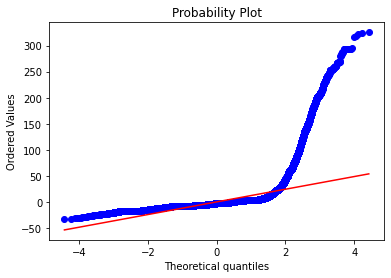

In [ ]:
from scipy import stats
# should be less deviated

stats.probplot(ols_mod.resid, plot=plt);

**Inference:**
    Actually there should be less deaviation however we can see it highly deviated so probably not-linear

### 4. Autocorelation:

statistically we can use durbin watsom test to check auto-corealtion

    0-2: positive autocorrelation
      2: no autocorealtion
    2-4: negative autocorrelation

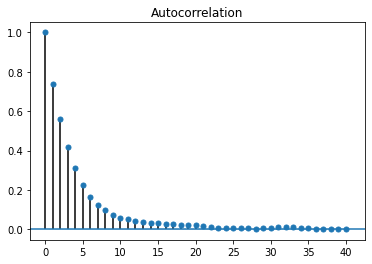

In [ ]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(ols_mod.resid, lags=40, alpha=0.6)

**Inference:**
    out durbin watson value is 0.4 indicating positive autocorelation, generally if residues are normally distributed we do not have auto-corelation problem , what we can do is probably scle the features or apply transformation on inputs one by one.

### 5. Homoscedasticity

checking whether residuals are symmetrically distributed across trend or follow a pattern (should be random)

In [ ]:
#statistical test
 # H0: model is homoscadic
 # H1: model is heteroscadic

from statsmodels.stats.api import het_goldfeldquandt
t,pval, _ = het_goldfeldquandt(ols_mod.resid, ols_mod.model.exog)

if pval >0.05:
    print("Null accepted: homoscedastic")
else:
    print("Null rejected: heteroscadic")

Null accepted: homoscedastic


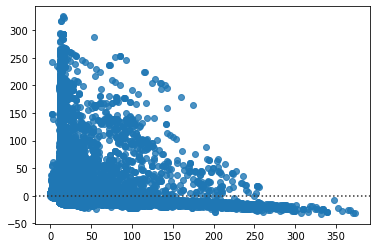

In [ ]:
# checking visually
sns.residplot(ypred, ols_mod.resid)

**Inference:**
    As we can see half of the assumptions as not satisfied so it is not best to use the linear model over here.

## Using vif selected features

In [ ]:
# Creating scorecard to compare model and their performances
score_card = pd.DataFrame(columns=['model_name', 'train_rmse', 'test_rmse', 'train_rsquared', 'test_rsquared'])

score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared


# Model 1: Linear model with vif selected features

In [ ]:
# we checked notify doesnt seem to be significant lets remove the features
inp3 = inp1.drop('notify', axis=1)
# y

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(inp3, y, test_size=0.3, random_state=0)

In [ ]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape


((99198, 10), (42514, 10), (99198,), (42514,))

In [ ]:
# X_constant=sm.add_constant(xtrain)

# ols1 = sm.OLS(y, X_constant)
# ols_mod1 = ols.fit()
# ols_mod1.summary()

In [ ]:
from sklearn.linear_model import LinearRegression

lr_mod_vif = LinearRegression()

# train the model
lr_mod_vif.fit(xtrain, ytrain)

# predict the values
ypred_train = lr_mod_vif.predict(xtrain)
ypred_test = lr_mod_vif.predict(xtest)

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_lr_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_lr_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_lr_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_lr_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updatinf the score_card
lr_model_vif_sc = pd.Series({'model_name' : 'Linear model using vif selected features', 
                             'train_rmse' : rmse_train_lr_vif, 'test_rmse' : rmse_test_lr_vif, 
                             'train_rsquared' : rsquared_train_lr_vif, 'test_rsquared' : rsquared_test_lr_vif})

score_card = score_card.append(lr_model_vif_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522


**Inference:** 
    We can see models performance is not the best rsquare is only 0.54 and error is around 18 which is not the best however we can see the difference between train and test values is not very much indicatingn the model does not overfit.

# Non-linear Models:

##  Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_mod_vif = DecisionTreeRegressor()

# train the model
dt_mod_vif.fit(xtrain, ytrain)

# predict the values
ypred_train = dt_mod_vif.predict(xtrain)
ypred_test = dt_mod_vif.predict(xtest)

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_dt_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_dt_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_dt_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_dt_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
dt_model_vif_sc = pd.Series({'model_name' : 'Decision Tree model using vif selected features', 
                             'train_rmse' : rmse_train_dt_vif, 'test_rmse' : rmse_test_dt_vif, 
                             'train_rsquared' : rsquared_train_dt_vif, 'test_rsquared' : rsquared_test_dt_vif})

score_card = score_card.append(dt_model_vif_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.551,0.999,0.461


**Inference:**
    If we see decision tree model we can see training performs extremely well with r2 score of 0.99 and rmse is only 0.87, however testing scores are pretty less indicating overfit model, we can also notice testing rmse is close to 20 

In [ ]:
# help(DecisionTreeRegressor)

In [ ]:
# # lets try tuning our descision tree
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {'criterion' : ['mse','mae', 'gini', 'entropy'],
#              'max_depth' : np.arange(1,20),
#              'min_samples_split' : np.arange(1,10),
#               'min_samples_split' : np.arange(1,10),
#               'max_features' : np.arange(1,20)
#              }

# searcher = RandomizedSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

# #train model
# searcher.fit(xtrain, ytrain)

## SGD Model

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_model =SGDRegressor()

#training the model
sgd_model = sgd_model.fit(xtrain, ytrain)

# predict the values
ypred_train = sgd_model.predict(xtrain)
ypred_test = sgd_model.predict(xtest)

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_sgd_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_sgd_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_sgd_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_sgd_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
sgd_model_vif_sc = pd.Series({'model_name' : 'SGD model using vif selected features', 
                             'train_rmse' : rmse_train_sgd_vif, 'test_rmse' : rmse_test_sgd_vif, 
                             'train_rsquared' : rsquared_train_sgd_vif, 'test_rsquared' : rsquared_test_sgd_vif})

score_card = score_card.append(sgd_model_vif_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,1.850700e+01,1.791400e+01,5.430000e-01,5.470000e-01
1,Decision Tree model using vif selected features,8.720000e-01,1.959500e+01,9.990000e-01,4.580000e-01
2,SGD model using vif selected features,4.349346e+11,4.334164e+11,-2.522926e+20,-2.650801e+20


434934641890.034

**Inference:**
    If we check SGD has done a good job in terms of performance error values are extrelemly high and varying., whereas rsquared is extremely less

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_mod_vif = RandomForestRegressor(n_estimators=30)

# train the model
rf_mod_vif.fit(xtrain, ytrain)

# predict the values
ypred_train = rf_mod_vif.predict(xtrain)
ypred_test = rf_mod_vif.predict(xtest)

KeyboardInterrupt: ignored

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_rf_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_rf_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_rf_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_rf_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
rf_model_vif_sc = pd.Series({'model_name' : 'rf model using vif selected features', 
                             'train_rmse' : rmse_train_rf_vif, 'test_rmse' : rmse_test_rf_vif, 
                             'train_rsquared' : rsquared_train_rf_vif, 'test_rsquared' : rsquared_test_rf_vif})

score_card = score_card.append(rf_model_vif_sc, ignore_index=True)
score_card

# XGBoost Model

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)
xg_reg.fit(xtrain, ytrain)

# predict the values
ypred_train = xg_reg.predict(xtrain)
ypred_test = xg_reg.predict(xtest)

In [ ]:
# Evaluating model's pexgbormance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_xgb_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_xgb_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_xgb_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_xgb_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
xgb_model_vif_sc = pd.Series({'model_name' : 'XG Boost model using vif selected features', 
                             'train_rmse' : rmse_train_xgb_vif, 'test_rmse' : rmse_test_xgb_vif, 
                             'train_rsquared' : rsquared_train_xgb_vif, 'test_rsquared' : rsquared_test_xgb_vif})

score_card = score_card.append(xgb_model_vif_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.551,0.999,0.461
2,rf model using vif selected features,5.489,13.862,0.960,0.729
3,XG Boost model using vif selected features,5.489,13.862,0.960,0.729
4,XG Boost model using vif selected features,20.987,20.385,0.413,0.414


In [ ]:
# Hypertuning XGBoost
from sklearn.model_selection import cross_val_score

data_dmatrix = xgb.DMatrix(data=inp1, label=y)
params = {'booster':'gblinear', 'objective':'reg:linear', 'max_depth':[4,5,10]}

cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=4, num_boost_round=5, metrics = 'mae', as_pandas=True, seed=123)

[02:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:59:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,11.457585,0.047088,11.457985,0.075426
1,9.500338,0.032965,9.500957,0.051270
2,8.400009,0.026958,8.400717,0.039522
3,7.877860,0.022824,7.878563,0.035031
4,7.724992,0.020681,7.725754,0.036322


In [ ]:
# Hypertuning XGBoost
from sklearn.model_selection import cross_val_score

data_dmatrix = xgb.DMatrix(data=inp1, label=y)
params = {'booster':'gblinear', 'objective':'reg:squarederror', 'max_depth':[4,5,10]}

cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=4, num_boost_round=5, metrics = 'rmse', as_pandas=True, seed=123)

In [ ]:
display(cv_results)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,22.179670,0.133673,22.177491,0.404873
1,20.188369,0.125232,20.186447,0.378415
2,19.430343,0.124753,19.428450,0.372577
3,19.130596,0.125778,19.128824,0.373362
4,19.003111,0.126674,19.001315,0.375874


## Regularization in XGB


In [ ]:
data_dmatrix = xgb.DMatrix(data = inp1, label=y)
params = {"objective":"reg:squarederror", 'max_depth':4}
l1_paramns=[1,2,3,5,10,100]
rmse_l1 = []

for reg in l1_paramns:
    params['alpha'] = reg
    cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=4, num_boost_round=5, metrics = 'rmse', as_pandas=True, seed=123)
    rmse_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
    print("Best rmse as a fxn of l1:")
    print(pd.DataFrame(list(zip(l1_paramns,rmse_l1)) ,columns=["l1","rmse"]))

Best rmse as a fxn of l1:
   l1       rmse
0   1  18.808832
Best rmse as a fxn of l1:
   l1       rmse
0   1  18.808832
1   2  18.808954
Best rmse as a fxn of l1:
   l1       rmse
0   1  18.808832
1   2  18.808954
2   3  18.809077
Best rmse as a fxn of l1:
   l1       rmse
0   1  18.808832
1   2  18.808954
2   3  18.809077
3   5  18.809346
Best rmse as a fxn of l1:
   l1       rmse
0   1  18.808832
1   2  18.808954
2   3  18.809077
3   5  18.809346
4  10  18.810628
Best rmse as a fxn of l1:
    l1       rmse
0    1  18.808832
1    2  18.808954
2    3  18.809077
3    5  18.809346
4   10  18.810628
5  100  18.821805


In [ ]:
data_dmatrix = xgb.DMatrix(data = inp1, label=y)
params = {"objective":"reg:squarederror", 'max_depth':30}
l1_paramns=[0.000001,0.0001,0.01, 1, 3, 5, 10]
rmse_l1 = []

for reg in l1_paramns:
    params['alpha'] = reg
    cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=4, num_boost_round=5, metrics = 'rmse', as_pandas=True, seed=123)
    rmse_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
    print("Best rmse as a fxn of l1:")
    print(pd.DataFrame(list(zip(l1_paramns,rmse_l1)) ,columns=["l1","rmse"]))

Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
1  0.000100  15.228866
Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
1  0.000100  15.228866
2  0.010000  15.235256
Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
1  0.000100  15.228866
2  0.010000  15.235256
3  1.000000  15.211939
Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
1  0.000100  15.228866
2  0.010000  15.235256
3  1.000000  15.211939
4  3.000000  15.187411
Best rmse as a fxn of l1:
         l1       rmse
0  0.000001  15.232357
1  0.000100  15.228866
2  0.010000  15.235256
3  1.000000  15.211939
4  3.000000  15.187411
5  5.000000  15.174512
Best rmse as a fxn of l1:
          l1       rmse
0   0.000001  15.232357
1   0.000100  15.228866
2   0.010000  15.235256
3   1.000000  15.211939
4   3.000000  15.187411
5   5.000000  15.174512
6  10.000000  15.308945


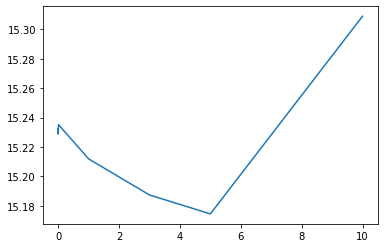

In [ ]:
plt.plot(l1_paramns, rmse_l1)

**Inference:**
    It is obeserved that when max_dept is high and l1_params need to be somehwere in middle to get better scores.

In [ ]:
data_dmatrix = xgb.DMatrix(data = inp1, label=y)
params = {"objective":"reg:squarederror", 'max_depth':50}
l1_paramns=[0.01, 1, 3, 5,7, 10]
rmse_l1 = []

for reg in l1_paramns:
    params['alpha'] = reg
    cv_results = xgb.cv(dtrain = data_dmatrix, params=params, nfold=4, num_boost_round=5, metrics = 'rmse', as_pandas=True, seed=123)
    rmse_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])
    print("Best rmse as a fxn of l1:")
    print(pd.DataFrame(list(zip(l1_paramns,rmse_l1)) ,columns=["l1","rmse"]))

Best rmse as a fxn of l1:
     l1      rmse
0  0.01  15.23588
Best rmse as a fxn of l1:
     l1       rmse
0  0.01  15.235880
1  1.00  15.234225
Best rmse as a fxn of l1:
     l1       rmse
0  0.01  15.235880
1  1.00  15.234225
2  3.00  15.197814
Best rmse as a fxn of l1:
     l1       rmse
0  0.01  15.235880
1  1.00  15.234225
2  3.00  15.197814
3  5.00  15.184625
Best rmse as a fxn of l1:
     l1       rmse
0  0.01  15.235880
1  1.00  15.234225
2  3.00  15.197814
3  5.00  15.184625
4  7.00  15.258803
Best rmse as a fxn of l1:
      l1       rmse
0   0.01  15.235880
1   1.00  15.234225
2   3.00  15.197814
3   5.00  15.184625
4   7.00  15.258803
5  10.00  15.284068


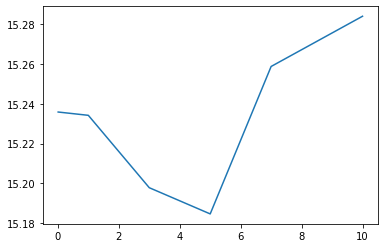

In [ ]:
sns.lineplot(l1_paramns, rmse_l1)

**Inference:**
    It seems like we are getting lowest rmse for 5 as l1, when max_depth=30 

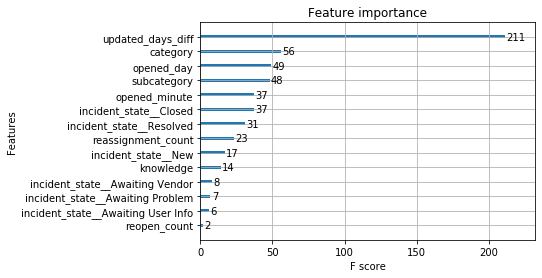

In [ ]:
# checking important features in the model
xgb.plot_importance(xg_reg)

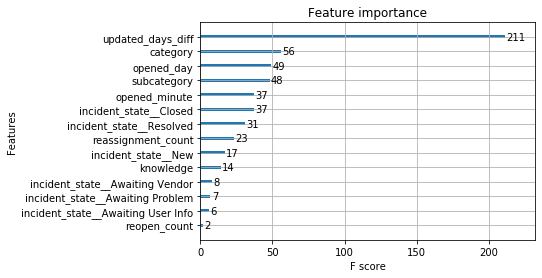

In [ ]:
# lets rebuild are model with hypertuned paprameters for XGB


# XGBoost Regressor Hypertuned

In [ ]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123, max_depth=30, l1=5)
xg_reg.fit(xtrain, ytrain)

# predict the values
ypred_train = xg_reg.predict(xtrain)
ypred_test = xg_reg.predict(xtest)

In [ ]:
# Evaluating model's pexgbormance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_xgb_vif = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_xgb_vif = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_xgb_vif = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_xgb_vif = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
xgb_model_vif_sc_tuned = pd.Series({'model_name' : 'XG Boost model using vif selected features - (Hypertuned)', 
                             'train_rmse' : rmse_train_xgb_vif, 'test_rmse' : rmse_test_xgb_vif, 
                             'train_rsquared' : rsquared_train_xgb_vif, 'test_rsquared' : rsquared_test_xgb_vif})

score_card = score_card.append(xgb_model_vif_sc_tuned, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.551,0.999,0.461
2,rf model using vif selected features,5.489,13.862,0.960,0.729
3,XG Boost model using vif selected features,5.489,13.862,0.960,0.729
4,XG Boost model using vif selected features,20.987,20.385,0.413,0.414
5,XG Boost model using vif selected features - (...,13.862,17.888,0.744,0.548


# using all features

In [ ]:
data_final.head()

,incident_state,active,reassignment_count,reopen_count,sys_mod_count,contact_type,category,subcategory,u_symptom,knowledge,u_priority_confirmation,notify,predicted_closed_days,opened_year,opened_month,opened_day,opened_hour,opened_minute,updated_days_diff,priority_calculated
0,7,1,0,0,0,3,46,69,501,1,0,0,5.447222,2016,2,29,1,16,0.004861,3
1,8,1,0,0,2,3,46,69,501,1,0,0,5.447222,2016,2,29,1,16,0.317361,3
2,8,1,0,0,3,3,46,69,501,1,0,0,5.447222,2016,2,29,1,16,0.425694,3
3,6,0,0,0,4,3,46,69,501,1,0,0,5.447222,2016,2,29,1,16,5.447222,3
4,7,1,0,0,0,3,30,112,352,1,0,0,6.222222,2016,2,29,4,40,0.011806,3


In [ ]:
# we checked notify doesnt seem to be significant lets remove the features
inp4 = data_final.drop('predicted_closed_days', axis=1)
y = data_final['predicted_closed_days']
inp4.columns

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'contact_type', 'category', 'subcategory', 'u_symptom',
       'knowledge', 'u_priority_confirmation', 'notify', 'opened_year',
       'opened_month', 'opened_day', 'opened_hour', 'opened_minute',
       'updated_days_diff', 'priority_calculated'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(inp4, y, test_size=0.3, random_state=0)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_mod_all = RandomForestRegressor(n_estimators=30)

# train the model
rf_mod_all.fit(xtrain, ytrain)

# predict the values
ypred_train = rf_mod_all.predict(xtrain)
ypred_test = rf_mod_all.predict(xtest)

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_rf_all = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_rf_all = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_rf_all = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_rf_all = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
rf_model_all_sc = pd.Series({'model_name' : 'rf model using all features', 
                             'train_rmse' : rmse_train_rf_all, 'test_rmse' : rmse_test_rf_all, 
                             'train_rsquared' : rsquared_train_rf_all, 'test_rsquared' : rsquared_test_rf_all})

score_card = score_card.append(rf_model_all_sc, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.551,0.999,0.461
2,rf model using vif selected features,5.489,13.862,0.960,0.729
3,XG Boost model using vif selected features,5.489,13.862,0.960,0.729
4,XG Boost model using vif selected features,20.987,20.385,0.413,0.414
5,XG Boost model using vif selected features - (...,13.862,17.888,0.744,0.548
6,rf model using all features,5.120,12.765,0.965,0.770


In [ ]:
# # lets try tuning our descision tree
from sklearn.model_selection import RandomizedSearchCV

# param_grid = {'criterion' : ['mse'],
#              'max_depth' : [10, 15, 20, 25, 30, 35, 40, 50, 55],
#              'min_samples_split' : [3, 5, 9, 12,15,20,25,30],
#               'max_features' :[2,4, 5, 10, 15, 20, 25],
#               'max_leaf_nodes' : [2,4,5,10,15],
#               'max_samples' : [2,4,5,10,15, 20, 25, 30],
#               'n_estimators' : [30]
#              }

param_grid = {'criterion' : ['mse'],
             'max_depth' : np.arange(2,50),
             'min_samples_split' : np.arange(2,50),
              'max_features' :np.arange(2,30),
              # 'max_leaf_nodes' : np.arange(2,50,3),
              # 'max_samples' : np.arange(2,50,3),
              'n_estimators' : [30]
             }

searcher = RandomizedSearchCV(RandomForestRegressor(random_state=123), param_grid, cv=5, random_state=0)

#train model
searcher.fit(inp4, y)

In [ ]:
searcher.best_params_

In [ ]:
# building rf model using all features and hypertuned parameters


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_mod_all_tuned = RandomForestRegressor(criterion='mse', max_depth= 5, max_features=11, max_leaf_nodes= 8, max_samples= 47, min_samples_split= 35, n_estimators= 30, random_state=0)

# train the model
rf_mod_all_tuned.fit(xtrain, ytrain)

# predict the values
ypred_train = rf_mod_all_tuned.predict(xtrain)
ypred_test = rf_mod_all_tuned.predict(xtest)

In [ ]:
# Evaluating model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#calculating rmse
rmse_train_rf_all_tuned = np.round(np.sqrt(mean_squared_error(ytrain, ypred_train)),3)
rmse_test_rf_all_tuned = np.round(np.sqrt(mean_squared_error(ytest, ypred_test)),3)

# calculating rsquared
rsquared_train_rf_all_tuned = np.round(r2_score(ytrain, ypred_train),3)
rsquared_test_rf_all_tuned = np.round(r2_score(ytest, ypred_test),3)

In [ ]:
# updating the score_card
rf_model_all_sc_tuned = pd.Series({'model_name' : 'rf model using all features - (tuned)', 
                             'train_rmse' : rmse_train_rf_all_tuned, 'test_rmse' : rmse_test_rf_all_tuned, 
                             'train_rsquared' : rsquared_train_rf_all_tuned, 'test_rsquared' : rsquared_test_rf_all_tuned})

score_card = score_card.append(rf_model_all_sc_tuned, ignore_index=True)
score_card

,model_name,train_rmse,test_rmse,train_rsquared,test_rsquared
0,Linear model using vif selected features,19.001,18.401,0.518,0.522
1,Decision Tree model using vif selected features,0.872,19.551,0.999,0.461
2,rf model using vif selected features,5.489,13.862,0.960,0.729
3,XG Boost model using vif selected features,5.489,13.862,0.960,0.729
4,XG Boost model using vif selected features,20.987,20.385,0.413,0.414
5,XG Boost model using vif selected features - (...,13.862,17.888,0.744,0.548
6,rf model using all features,5.120,12.765,0.965,0.770
7,rf model using all features - (tuned),9.013,13.721,0.892,0.734
8,rf model using all features - (tuned),13.080,14.958,0.772,0.684
9,rf model using all features - (tuned),12.973,14.840,0.776,0.689
